<B/> Import all Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

<B/> Upload the dataset

In [2]:
data=pd.read_csv('Fever.csv')

<I/><B/> Check the top 5 record

In [3]:
data.head(5)

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


<B/><I/> Check the shape of the dataset

In [4]:
data.shape

(36, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


<B/><I/> Check the missing values

In [7]:
data.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

<B/><I/> Checking for any outliers

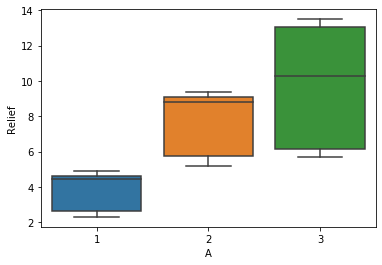

In [11]:
sns.boxplot(x="A", y="Relief", data=data)

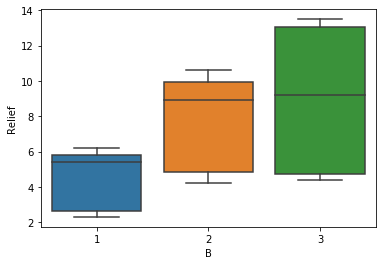

In [12]:
sns.boxplot(x="B", y="Relief", data=data)

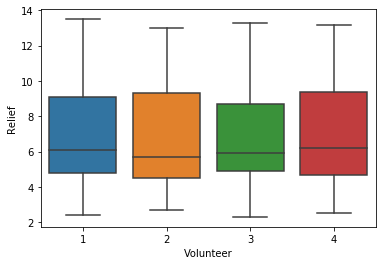

In [13]:
sns.boxplot(x="Volunteer", y="Relief", data=data)

<N/> <B/> 1.1 State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

<B/><I/> Hypothesis for One way Anova for "A"

𝐻o :The mean value of "Relief" with respect to factor "A" are equal

𝐻a : At least one of the means of 'Relief' with respect to factor "A" is unequal.

<B/><I/> Hypothesis for One way Anova for "B"

𝐻o :The mean value of "Relief" with respect to factor "B" are equal

𝐻a : At least one of the means of 'Relief' with respect to factor "B" is unequal.

<B><N> 1.2 Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

𝐻o :The mean value of "Relief" with respect to factor "A" are equal

𝐻a : At least one of the means of 'Relief' with respect to factor "A" is unequal.

In [14]:
formula = 'Relief ~ C(A)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


<I/> The degree of freedom for Factor "A" is 2 (3-1) where the sum of square is 220.02. The F Value is 23.47. The P Value (0.00001) is less than α = 0.05. Hence we would come to a conclusion that the all the mean value of relief for factor "A" is not equal. Hence we reject the null hypothesis.

<B/><N/> 1.3 Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

𝐻o :The mean value of "Relief" with respect to factor "B" are equal

𝐻a : At least one of the means of 'Relief' with respect to factor "B" is unequal.

In [17]:
formula = 'Relief ~ C(B)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


<I><F/> The degree of freedom for Factor "B" is 2 (3-1) where the sum of square is 123.83. The F Value is 8.13. The P Value (0.00135) is less than α = 0.05. Hence we would come to a conclusion that the all the mean value of Relief for factor "B" is  similar. Hence we reject the null hypothesis.

<B><N/> 1.4 Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments?

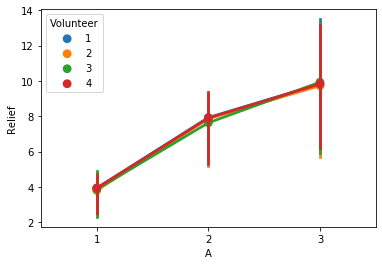

In [23]:
sns.pointplot(x = 'A', y = 'Relief',data=data,hue='Volunteer')

<I/> Considering the above point plot, the volunteers related to Factor "A" for relief variable shows that the volunteer 1,2,4 are highly interactive and 3 is slightly interactive.

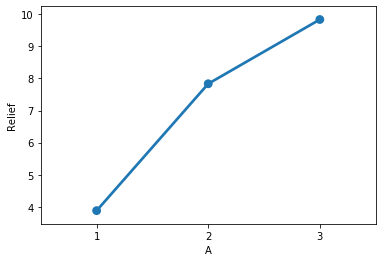

In [19]:
sns.pointplot(x = 'A', y = 'Relief',data=data,ci=None)

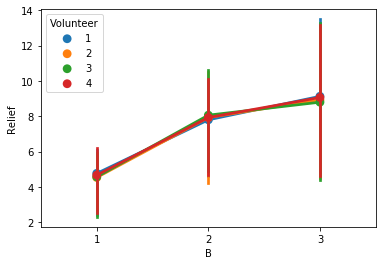

In [24]:
sns.pointplot(x = 'B', y = 'Relief',data=data,hue='Volunteer')

<I/> Considering the above point plot, the volunteers related to Factor "A" for relief variable shows that they are highly interactive.

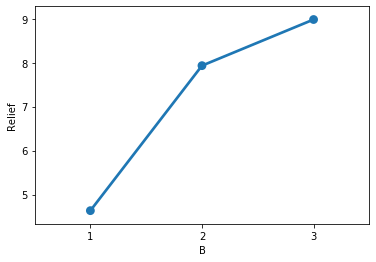

In [22]:
sns.pointplot(x = 'B', y = 'Relief',data=data,ci=None)

<B/><N/> 1.5 Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

Ho: The mean of "Relief"variable for both A and B are equal

Ha: At least one of the means of 'Relief' variable with respect to each A and B is unequal

In [25]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [26]:
formula = 'Relief ~ C(A) + C(B)+C(A):C(B)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


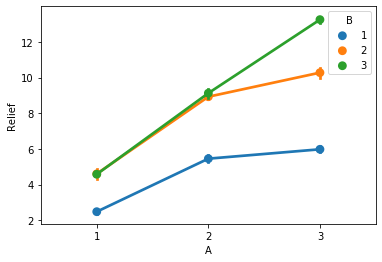

In [27]:
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=data)

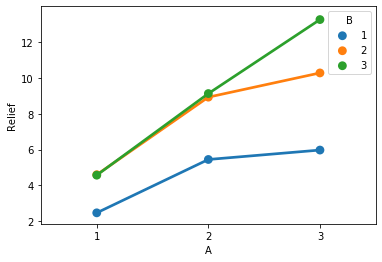

In [29]:
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=data,ci=None)

<I/>  We are checking whether there is any significant interaction between both the factor "A"&"B" in terms of variable "Relief". One of the variable is not interactive for Factor "A" in terms of variable "Relief". We would come to a conclusion that the mean value of Relief cannot be correctly defined with two different factors A and B. The P Value is less than α (0.05), hence we reject the null hypothesis.

<B/> <N/> 1.6 Mention the business implications of performing ANOVA for this particular case study.

<I/> The test statistics for the main effects A and B are F = 1827.9 and F = 1027.3, respectively. the p-values are less than 0.05 for each. We reject the null hypothesis and conclude that the responses significantly differ across the levels of the two ingredients, while holding constant the other and the interactions